In [1]:
import numpy as np
from grakel.datasets import fetch_dataset
from grakel.kernels import WeisfeilerLehman, VertexHistogram
from grakel.kernels import SubgraphMatching, GraphletSampling, ShortestPath, RandomWalk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataname = 'MUTAG'

print(f'Fetching {dataname} dataset...')
data = fetch_dataset(dataname.upper(), verbose=False, prefer_attr_nodes=False)
print(f'Finish fetching!')
G, y = data.data, data.target

Fetching MUTAG dataset...
Finish fetching!


In [3]:
from sklearn.model_selection import train_test_split
G_train, G_test, y_train, y_test = train_test_split(G, y, test_size=0.1, random_state=42)

In [4]:
np.unique(y_train)

array([-1,  1])

In [5]:
G_train_adj = np.row_stack([np.array(G_train)[np.where(y_train == -1)[0].astype(np.uint64)],
                            np.array(G_train)[np.where(y_train == 1)[0].astype(np.uint64)]])

In [6]:
len(np.where(y_train == -1)[0]), len(np.where(y_train == 1)[0]), np.unique(y_train), len(G_train_adj)

(56, 113, array([-1,  1]), 169)

In [19]:
def get_WL(G, iter_num = 1):
    wl_kernel = WeisfeilerLehman(n_iter=iter_num, normalize=True, base_graph_kernel=VertexHistogram)
    K = wl_kernel.fit_transform(G)
    # plt.figure(figsize=(14,12))
    sns.heatmap(K)
    plt.title(f'WL-{iter_num}')
    plt.show()
    return K

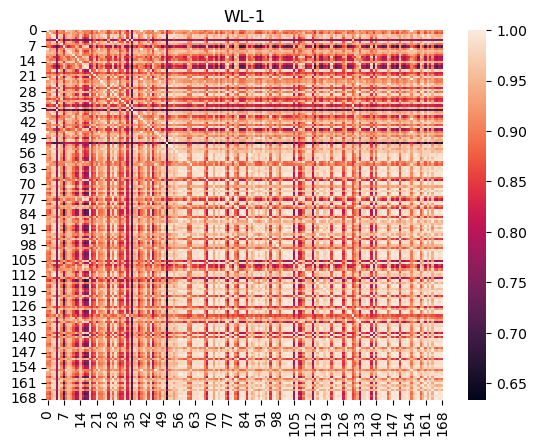

In [20]:
K_WL_1 = get_WL(G_train_adj, 1)

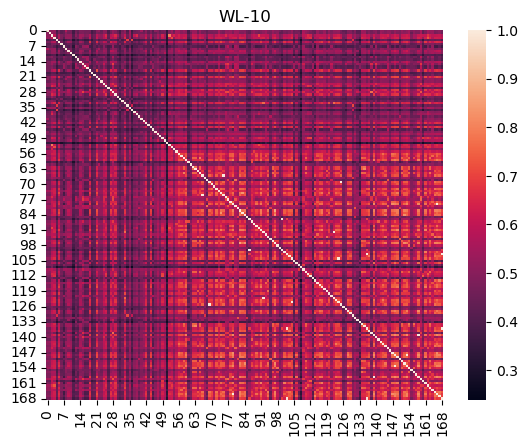

In [21]:
K_WL_10 = get_WL(G_train_adj, 10)

In [22]:
def get_GS(G, k_num = 4):
    wl_kernel = GraphletSampling(normalize=True, k=k_num)
    K = wl_kernel.fit_transform(G)
    print('Done fitting')
    print('Start plotting')
    # plt.figure(figsize=(14,12))
    sns.heatmap(K)
    plt.title(f'GS-{k_num}')
    plt.show()
    return K

Done fitting
Start plotting


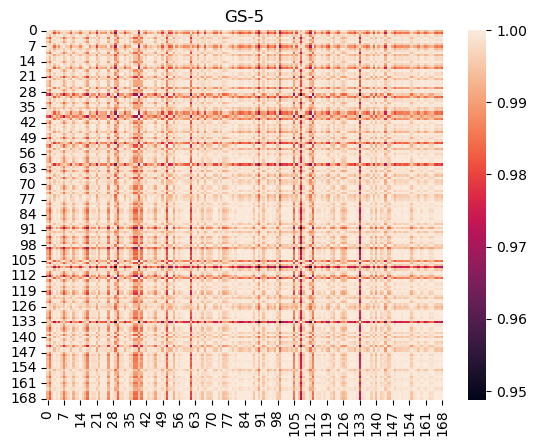

In [23]:
K_GS_5 = get_GS(G_train_adj, 5)

Done fitting
Start plotting


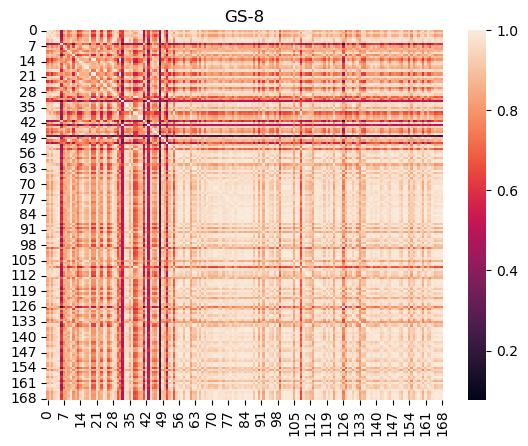

In [24]:
K_GS_8 = get_GS(G_train_adj, 8)

In [25]:
def get_SP(G):
    wl_kernel = ShortestPath(normalize=True, algorithm_type="floyd_warshall")
    K = wl_kernel.fit_transform(G)
    print('Done fitting')
    print('Start plotting')
    # plt.figure(figsize=(14,12))
    sns.heatmap(K)
    plt.title(f'SP')
    plt.show()
    return K


Done fitting
Start plotting


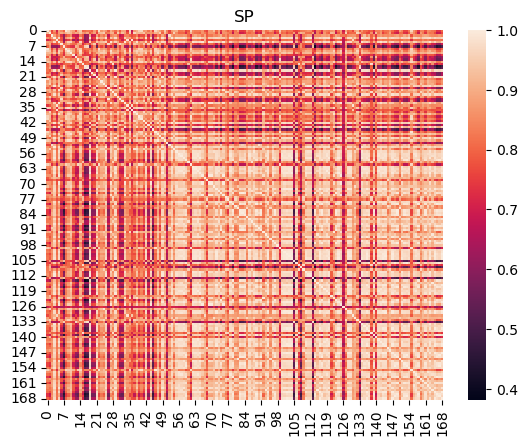

In [26]:
K_SP = get_SP(G_train_adj)

In [28]:
def get_RW(G, lambda_value = 0.1):
    wl_kernel = RandomWalk(lamda=lambda_value, normalize=True, kernel_type="exponential")
    K = wl_kernel.fit_transform(G)
    print('Done fitting')
    print('Start plotting')
    # plt.figure(figsize=(14,12))
    sns.heatmap(K)
    plt.title(f'RW-{lambda_value}')
    plt.show()
    return K


Done fitting
Start plotting


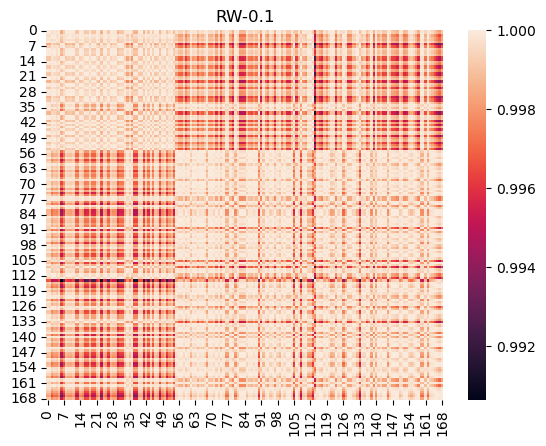

In [29]:
K_RW_01 = get_RW(G_train_adj, 0.1)

Done fitting
Start plotting


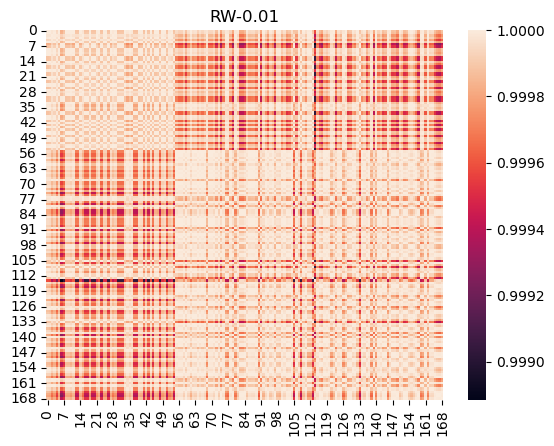

In [30]:
K_RW_001 = get_RW(G_train_adj, 0.01)

In [36]:
from sklearn.preprocessing import MinMaxScaler

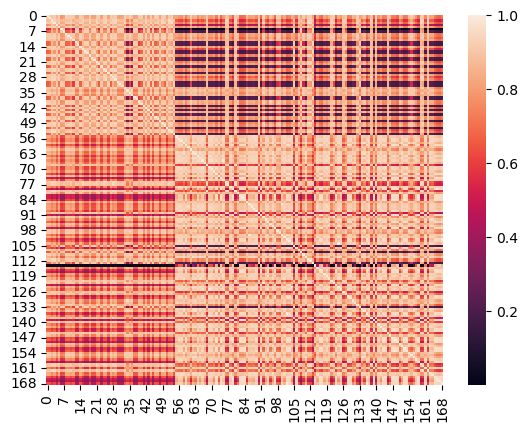

In [48]:
alpha = 0.9
scaler = MinMaxScaler()
K_normalized = alpha * scaler.fit_transform(K_RW_001) + (1-alpha) * scaler.fit_transform(K_WL_10) 
# K_normalized /= K_normalized.max()
sns.heatmap(K_normalized)
plt.show()